<a href="https://colab.research.google.com/github/CamilaAlexandraSalas/ProyectoFinal_AnalisisDeDatos/blob/main/ejercicio3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejercicio 3: Predicción de consumo excesivo de agua en manzanas de la CDMX

De acuerdo con los datos públicos de consumo de agua en la Ciudad de México, predece si una manzana (unidad geográfica censal) presentará un consumo excesivo de agua en un próximo periodo bimestral.

Información bimestral por el concepto de suministro de agua a nivel manzana, considerando la facturación por servicio de consumo medido y promedio. Última Actualización: 2 de febrero 2023

In [1]:
%pip install polars

%pip install pandas
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pl.read_csv("consumo_agua_historico_2019.csv", null_values="NA")
df


fecha_referencia,anio,bimestre,consumo_total_mixto,consumo_prom_dom,consumo_total_dom,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,consumo_total_no_dom,indice_des,colonia,alcaldia,latitud,longitud
str,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,f64,f64
"""2019-06-30""",2019,3,159.72,42.566364,468.23,53.24,631.0,42.066667,3.05,3.05,"""ALTO""","""7 DE NOVIEMBRE""","""GUSTAVO A. MADERO""",19.45526,-99.112662
"""2019-06-30""",2019,3,0.0,35.936667,107.81,0.0,115.13,28.7825,7.32,7.32,"""MEDIO""","""7 DE NOVIEMBRE""","""GUSTAVO A. MADERO""",19.45526,-99.112662
"""2019-06-30""",2019,3,0.0,24.586,122.93,0.0,197.96,32.993333,75.03,75.03,"""POPULAR""","""7 DE NOVIEMBRE""","""GUSTAVO A. MADERO""",19.45572,-99.113582
"""2019-06-30""",2019,3,0.0,0.0,0.0,0.0,253.53,84.51,84.51,253.53,"""BAJO""","""GERTRUDIS SANCHEZ 3A SECCION""","""GUSTAVO A. MADERO""",19.459647,-99.104469
"""2019-06-30""",2019,3,56.72,67.43625,539.49,56.72,839.35,76.304545,121.57,243.14,"""BAJO""","""PRO HOGAR I""","""AZCAPOTZALCO""",19.474161,-99.14675
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""2019-02-28""",2019,1,null,20.053112,3930.41,null,4286.28,19.307568,13.687308,355.87,"""BAJO""","""GUERRERO I""","""CUAUHTEMOC""",19.448564,-99.13994
"""2019-02-28""",2019,1,71.3,21.126615,9549.24,35.650001,9796.12,20.976702,13.506923,175.59,"""POPULAR""","""GUERRERO I""","""CUAUHTEMOC""",19.449339,-99.145719
"""2019-02-28""",2019,1,759.16,27.527778,4707.25,94.894999,5692.81,29.344381,15.093334,226.4,"""BAJO""","""GUERRERO I""","""CUAUHTEMOC""",19.448392,-99.14593


In [4]:
#  primeras filas, esquema y dimensiones
print(df.head())
print(df.schema)
print("Dimensiones (filas, columnas):", df.shape)

# Contar valores nulos por columna
print("Valores nulos por columna:\n", df.null_count())

#  Estadísticas descriptivas
print(df.describe())

print(df.shape)
# Glimpse: vista densa de columnas y tipos
df.glimpse()

# Número aproximado de únicos por columna
print(df.approx_n_unique())

# Estimación del tamaño total del DataFrame
print(df.estimated_size("mb"), "MB")


shape: (5, 16)
┌────────────┬──────┬──────────┬────────────┬───┬────────────┬────────────┬───────────┬────────────┐
│ fecha_refe ┆ anio ┆ bimestre ┆ consumo_to ┆ … ┆ colonia    ┆ alcaldia   ┆ latitud   ┆ longitud   │
│ rencia     ┆ ---  ┆ ---      ┆ tal_mixto  ┆   ┆ ---        ┆ ---        ┆ ---       ┆ ---        │
│ ---        ┆ i64  ┆ i64      ┆ ---        ┆   ┆ str        ┆ str        ┆ f64       ┆ f64        │
│ str        ┆      ┆          ┆ f64        ┆   ┆            ┆            ┆           ┆            │
╞════════════╪══════╪══════════╪════════════╪═══╪════════════╪════════════╪═══════════╪════════════╡
│ 2019-06-30 ┆ 2019 ┆ 3        ┆ 159.72     ┆ … ┆ 7 DE       ┆ GUSTAVO A. ┆ 19.45526  ┆ -99.112662 │
│            ┆      ┆          ┆            ┆   ┆ NOVIEMBRE  ┆ MADERO     ┆           ┆            │
│ 2019-06-30 ┆ 2019 ┆ 3        ┆ 0.0        ┆ … ┆ 7 DE       ┆ GUSTAVO A. ┆ 19.45526  ┆ -99.112662 │
│            ┆      ┆          ┆            ┆   ┆ NOVIEMBRE  ┆ MADERO     ┆ 

/tmp/ipython-input-4-2582637898.py:17: DeprecationWarning: `DataFrame.approx_n_unique` is deprecated. Use `select(pl.all().approx_n_unique())` instead.
  print(df.approx_n_unique())
/tmp/ipython-input-4-2582637898.py:17: DeprecationWarning: `LazyFrame.approx_n_unique` is deprecated. Use `select(pl.all().approx_n_unique())` instead.
  print(df.approx_n_unique())


In [5]:
print(df.select("indice_des").unique())

shape: (4, 1)
┌────────────┐
│ indice_des │
│ ---        │
│ str        │
╞════════════╡
│ MEDIO      │
│ POPULAR    │
│ BAJO       │
│ ALTO       │
└────────────┘


#2. Limpieza básica.

In [7]:
# Checar si esta vacio
print("¿Está vacío?:", df.is_empty())
df = df.with_columns([
    pl.col(col).fill_null(0) for col in df.columns
])

# Conteo de nulos por columna
print("Nulos por columna:")
print(df.null_count())

# Eliminar duplicados
df = df.unique()

# Ver si hay filas duplicadas
duplicados_mask = df.is_duplicated()
print("¿Hay duplicados?:", duplicados_mask.any())

# Ver filas únicas
unicas_mask = df.is_unique()
print("¿Todas las filas son únicas?:", unicas_mask.all())

# Corregir los  tipos
df = df.with_columns([
    pl.col("consumo_total").cast(pl.Float64, strict=False),
    pl.col("indice_des").cast(pl.Float64, strict=False)
])


¿Está vacío?: False
Nulos por columna:
shape: (1, 16)
┌─────────────────┬──────┬──────────┬────────────────┬───┬─────────┬──────────┬─────────┬──────────┐
│ fecha_referenci ┆ anio ┆ bimestre ┆ consumo_total_ ┆ … ┆ colonia ┆ alcaldia ┆ latitud ┆ longitud │
│ a               ┆ ---  ┆ ---      ┆ mixto          ┆   ┆ ---     ┆ ---      ┆ ---     ┆ ---      │
│ ---             ┆ u32  ┆ u32      ┆ ---            ┆   ┆ u32     ┆ u32      ┆ u32     ┆ u32      │
│ u32             ┆      ┆          ┆ u32            ┆   ┆         ┆          ┆         ┆          │
╞═════════════════╪══════╪══════════╪════════════════╪═══╪═════════╪══════════╪═════════╪══════════╡
│ 0               ┆ 0    ┆ 0        ┆ 0              ┆ … ┆ 0       ┆ 0        ┆ 0       ┆ 0        │
└─────────────────┴──────┴──────────┴────────────────┴───┴─────────┴──────────┴─────────┴──────────┘
¿Hay duplicados?: False
¿Todas las filas son únicas?: True


Estadisticos

In [8]:
import polars as pl
import polars.selectors as cs

def resumen_estadistico(df: pl.DataFrame) -> pl.DataFrame:
    # Asegura que los valores como "NA" se traten como nulos al cargar, si no lo hiciste antes
    df = df.drop_nulls()

    # Selecciona solo columnas numéricas
    numericas = df.select(cs.numeric())
    cols = numericas.columns

    # Construir cada columna como Series con strict=False
    return pl.DataFrame([
        pl.Series("columna", cols),
        pl.Series("count", [numericas[col].count() for col in cols], strict=False),
        pl.Series("mean", [numericas[col].mean() for col in cols], strict=False),
        pl.Series("std", [numericas[col].std() for col in cols], strict=False),
        pl.Series("var", [numericas[col].var() for col in cols], strict=False),
        pl.Series("min", [numericas[col].min() for col in cols], strict=False),
        pl.Series("25%", [numericas[col].quantile(0.25, "nearest") for col in cols], strict=False),
        pl.Series("50% (median)", [numericas[col].median() for col in cols], strict=False),
        pl.Series("75%", [numericas[col].quantile(0.75, "nearest") for col in cols], strict=False),
        pl.Series("max", [numericas[col].max() for col in cols], strict=False),
        pl.Series("sum", [numericas[col].sum() for col in cols], strict=False),
    ])


In [9]:
df = pl.read_csv("consumo_agua_historico_2019.csv", null_values="NA")
resumen = resumen_estadistico(df)
print(resumen)


shape: (12, 11)
┌────────────┬───────┬────────────┬────────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ columna    ┆ count ┆ mean       ┆ std        ┆ … ┆ 50%       ┆ 75%       ┆ max       ┆ sum       │
│ ---        ┆ ---   ┆ ---        ┆ ---        ┆   ┆ (median)  ┆ ---       ┆ ---       ┆ ---       │
│ str        ┆ i64   ┆ f64        ┆ f64        ┆   ┆ ---       ┆ f64       ┆ f64       ┆ f64       │
│            ┆       ┆            ┆            ┆   ┆ f64       ┆           ┆           ┆           │
╞════════════╪═══════╪════════════╪════════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ anio       ┆ 62035 ┆ 2019.0     ┆ 0.0        ┆ … ┆ 2019.0    ┆ 2019.0    ┆ 2019.0    ┆ 1.2524866 │
│            ┆       ┆            ┆            ┆   ┆           ┆           ┆           ┆ 5e8       │
│ bimestre   ┆ 62035 ┆ 2.15048    ┆ 0.769794   ┆ … ┆ 2.0       ┆ 3.0       ┆ 3.0       ┆ 133405.0  │
│ consumo_to ┆ 62035 ┆ 174.717413 ┆ 311.945586 ┆ … ┆ 80.68     ┆ 234.47    

#3. Análisis exploratorio + visualización inicial

In [11]:
print(type(df))


<class 'polars.dataframe.frame.DataFrame'>


Frecuencia de Bimestres:
shape: (3, 2)
┌──────────┬───────┐
│ bimestre ┆ count │
│ ---      ┆ ---   │
│ i64      ┆ u32   │
╞══════════╪═══════╡
│ 1        ┆ 23266 │
│ 2        ┆ 23870 │
│ 3        ┆ 23750 │
└──────────┴───────┘

Frecuencia de Índice de Desarrollo:
shape: (4, 2)
┌────────────┬───────┐
│ indice_des ┆ count │
│ ---        ┆ ---   │
│ str        ┆ u32   │
╞════════════╪═══════╡
│ ALTO       ┆ 15495 │
│ BAJO       ┆ 29164 │
│ MEDIO      ┆ 9748  │
│ POPULAR    ┆ 16479 │
└────────────┴───────┘

Frecuencia de Alcaldías:
shape: (16, 2)
┌────────────────────────┬───────┐
│ alcaldia               ┆ count │
│ ---                    ┆ ---   │
│ str                    ┆ u32   │
╞════════════════════════╪═══════╡
│ IZTAPALAPA             ┆ 10518 │
│ GUSTAVO A. MADERO      ┆ 10058 │
│ CUAUHTEMOC             ┆ 7165  │
│ BENITO JUAREZ          ┆ 6049  │
│ VENUSTIANO CARRANZA    ┆ 5207  │
│ …                      ┆ …     │
│ XOCHIMILCO             ┆ 2513  │
│ TLAHUAC                ┆ 190

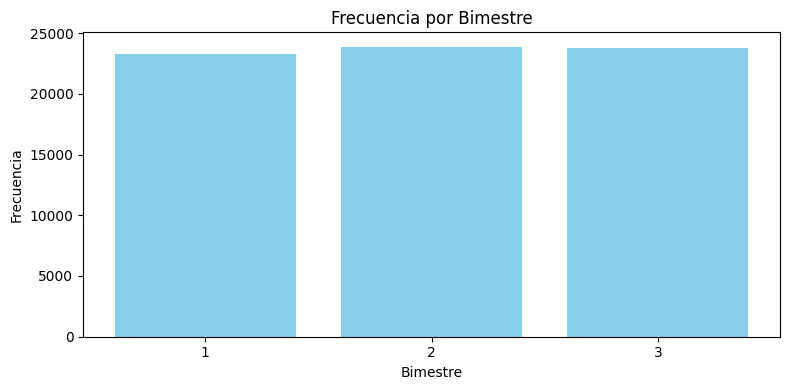

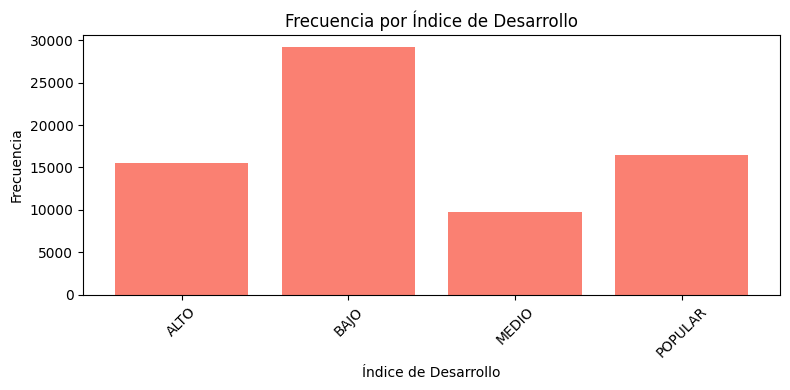

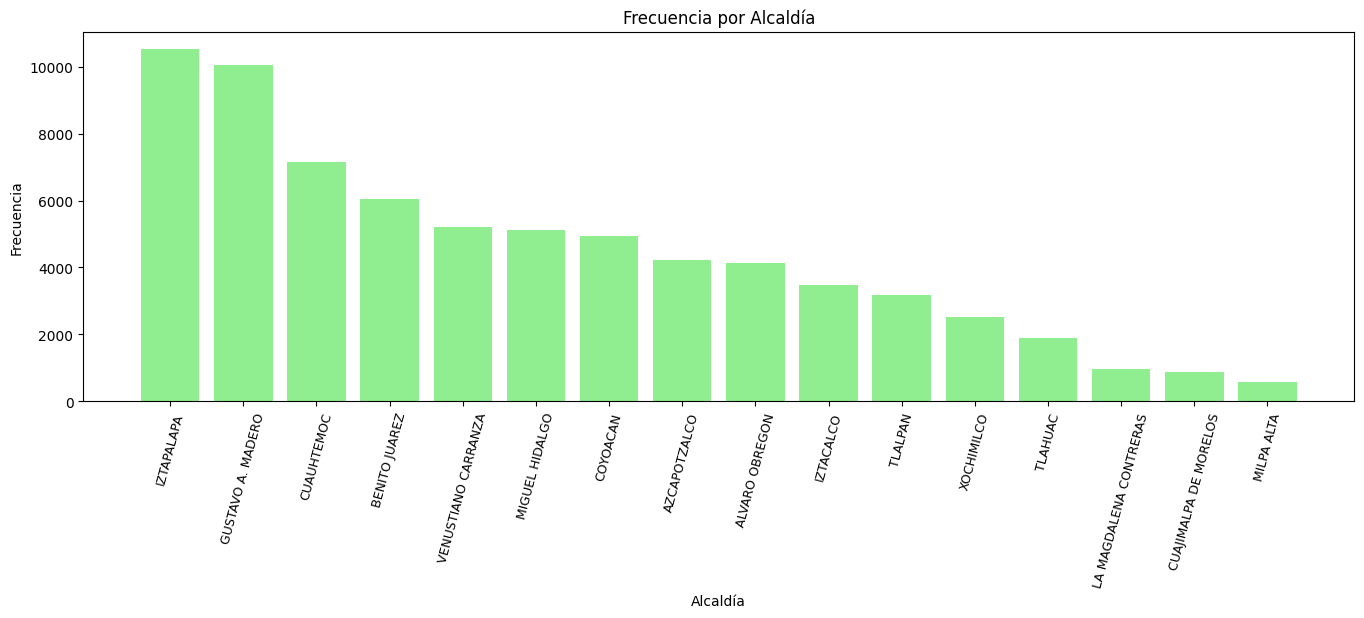

In [12]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

#  eliminar alcaldías nulas para evitar errores al graficar
df = df.filter(pl.col("alcaldia").is_not_null())

# Frecuencia  por bimestre
freq_bimestre = (
    df.select(pl.col("bimestre"))
    .to_series()
    .value_counts()
    .sort("bimestre")
)
print("Frecuencia de Bimestres:")
print(freq_bimestre)

# Frecuencia por índice de desarrollo
freq_indice = (
    df.select(pl.col("indice_des"))
    .to_series()
    .value_counts()
    .sort("indice_des")
)
print("\nFrecuencia de Índice de Desarrollo:")
print(freq_indice)

# Frecuencia  por alcaldía ( en orden descendente)
freq_alcaldia = (
    df.select(pl.col("alcaldia"))
    .to_series()
    .value_counts()
    .sort("count", descending=True)
)
print("\nFrecuencia de Alcaldías:")
print(freq_alcaldia)

# Convertir a numpy para gráficar

bimestres = freq_bimestre["bimestre"].to_numpy()
frecuencia_bim = freq_bimestre["count"].to_numpy()

indices = freq_indice["indice_des"].to_numpy()
frecuencia_ind = freq_indice["count"].to_numpy()

alcaldias = freq_alcaldia["alcaldia"].to_numpy()
frecuencia_alc = freq_alcaldia["count"].to_numpy()

#Gráficas

# Bimestres
x = np.arange(len(bimestres))
plt.figure(figsize=(8, 4))
plt.bar(x, frecuencia_bim, color='skyblue')
plt.title("Frecuencia por Bimestre")
plt.xlabel("Bimestre")
plt.ylabel("Frecuencia")
plt.xticks(x, bimestres)
plt.tight_layout()
plt.show()


# Índice de Desarrollo
plt.figure(figsize=(8, 4))
plt.bar(indices, frecuencia_ind, color='salmon')
plt.title("Frecuencia por Índice de Desarrollo")
plt.xlabel("Índice de Desarrollo")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Alcaldías
plt.figure(figsize=(14, 6))
plt.bar(alcaldias, frecuencia_alc, color='lightgreen')
plt.title("Frecuencia por Alcaldía")
plt.xlabel("Alcaldía")
plt.ylabel("Frecuencia")
plt.xticks(rotation=75, fontsize=9)
plt.tight_layout(pad=2)
plt.subplots_adjust(bottom=0.3)
plt.show()


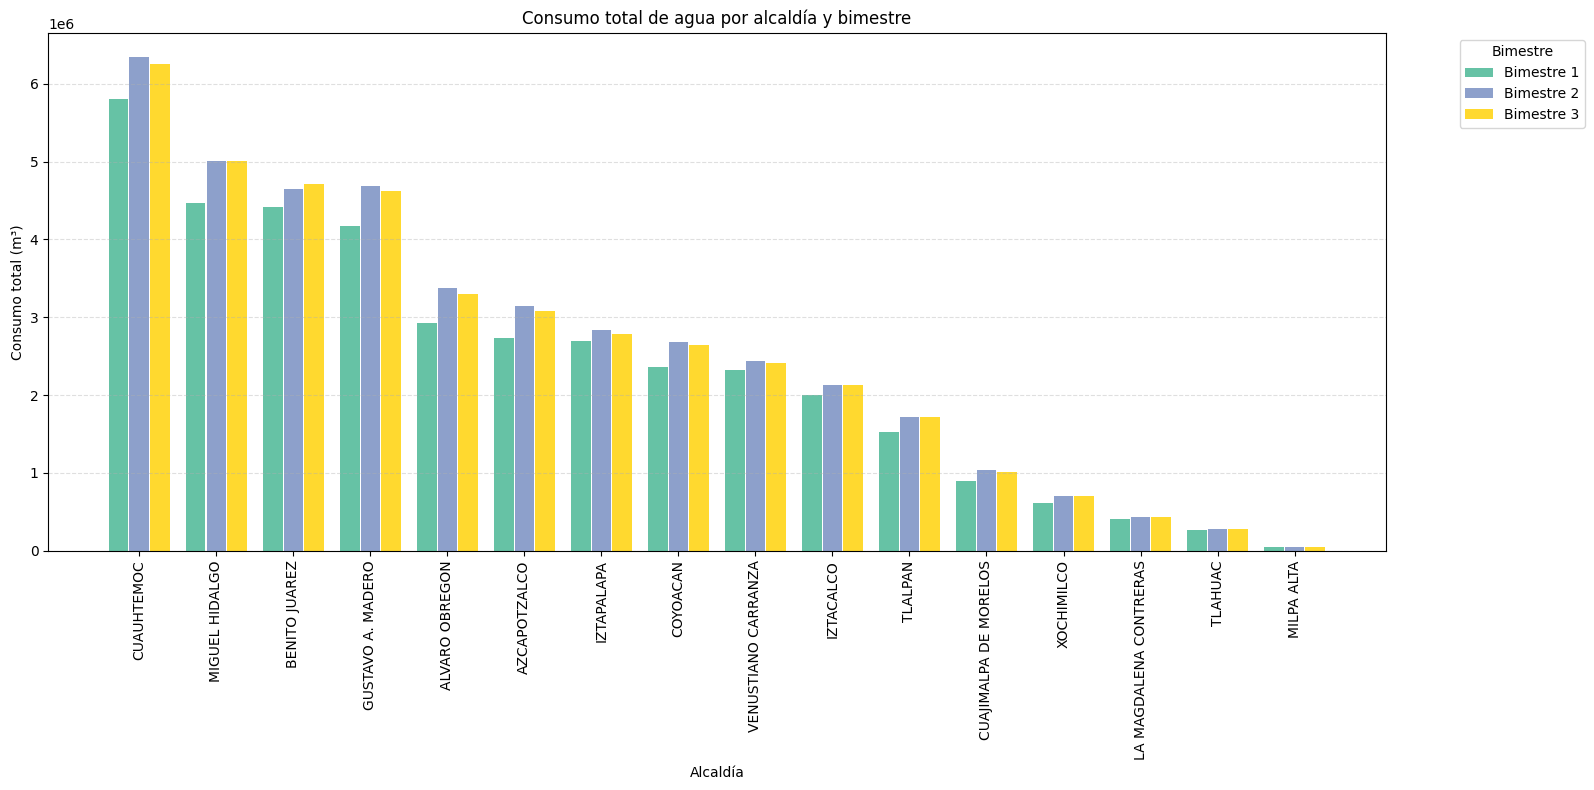

In [13]:
import polars as pl
import matplotlib.pyplot as plt
import numpy as np


df = df.with_columns([
    pl.col("consumo_total").cast(pl.Float64, strict=False)
]).filter(
    pl.col("consumo_total").is_not_null() &
    pl.col("alcaldia").is_not_null() &
    pl.col("bimestre").is_not_null()
)

#  Agrupar por alcaldía y bimestre
grupo = (
    df.group_by(["alcaldia", "bimestre"])
    .agg(pl.sum("consumo_total").alias("consumo_total"))
)

# Se obtiene el orden de alcaldías por consumo total acumulado
orden_alcaldias = (
    grupo.group_by("alcaldia")
    .agg(pl.sum("consumo_total").alias("total"))
    .sort("total", descending=True)
    .select("alcaldia")
    .to_series()
    .to_list()
)

# datos para matriz
alcaldias = orden_alcaldias
bimestres = sorted(df["bimestre"].unique().to_list())

# filas = alcaldías, columnas = bimestres
matriz = np.zeros((len(alcaldias), len(bimestres)))

# Llenar matriz
for row in grupo.iter_rows():
    alcaldia, bimestre, consumo = row
    i = alcaldias.index(alcaldia)
    j = bimestres.index(bimestre)
    matriz[i][j] = consumo

#  Gráfico de barras agrupadas
num_bimestres = len(bimestres)
ancho_total = 0.8
ancho_barra = ancho_total / num_bimestres
x = np.arange(len(alcaldias))

plt.figure(figsize=(16, 8))

for j, bimestre in enumerate(bimestres):
    plt.bar(
        x + j * ancho_barra,
        matriz[:, j],
        width=ancho_barra * 0.95,
        label=f"Bimestre {bimestre}",
        color=plt.cm.Set2(j / num_bimestres)
    )

plt.xticks(x + ancho_total / 2 - ancho_barra / 2, alcaldias, rotation=90)
plt.xlabel("Alcaldía")
plt.ylabel("Consumo total (m³)")
plt.title("Consumo total de agua por alcaldía y bimestre")
plt.legend(title="Bimestre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


In [14]:
grupo_total = grupo.group_by("alcaldia").agg(pl.sum("consumo_total").alias("total"))
print(grupo_total.sort("total", descending=True).head(16))


shape: (16, 2)
┌────────────────────────┬───────────┐
│ alcaldia               ┆ total     │
│ ---                    ┆ ---       │
│ str                    ┆ f64       │
╞════════════════════════╪═══════════╡
│ CUAUHTEMOC             ┆ 1.8402e7  │
│ MIGUEL HIDALGO         ┆ 1.4490e7  │
│ BENITO JUAREZ          ┆ 1.3780e7  │
│ GUSTAVO A. MADERO      ┆ 1.3480e7  │
│ ALVARO OBREGON         ┆ 9.6085e6  │
│ …                      ┆ …         │
│ CUAJIMALPA DE MORELOS  ┆ 2.9450e6  │
│ XOCHIMILCO             ┆ 2.0349e6  │
│ LA MAGDALENA CONTRERAS ┆ 1.2715e6  │
│ TLAHUAC                ┆ 829636.01 │
│ MILPA ALTA             ┆ 145411.88 │
└────────────────────────┴───────────┘


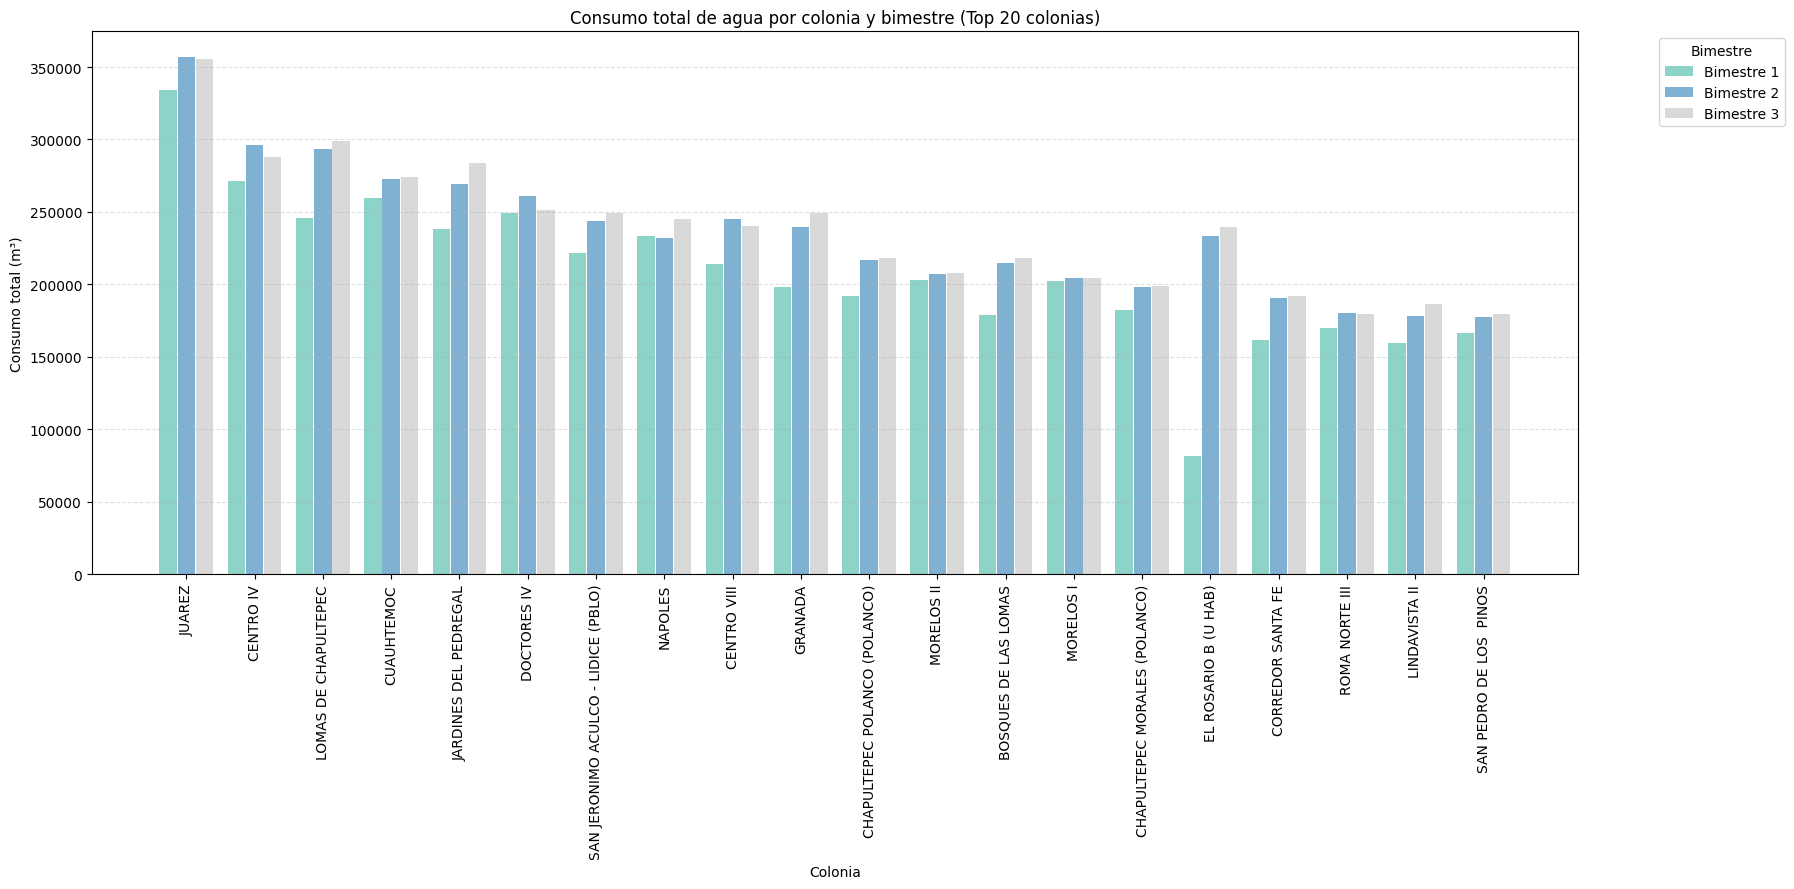

In [15]:
import polars as pl
import matplotlib.pyplot as plt
import numpy as np

# Limpiar los datos
df = df.with_columns([
    pl.col("consumo_total").cast(pl.Float64, strict=False)
]).filter(
    pl.col("consumo_total").is_not_null() &
    pl.col("colonia").is_not_null() &
    pl.col("bimestre").is_not_null()
)

# Agrupar por colonia y bimestre
grupo_cb = (
    df.group_by(["colonia", "bimestre"])
    .agg(pl.col("consumo_total").sum().alias("consumo_total"))
)

#  Top 20 colonias por consumo total acumulado
top_colonias = (
    grupo_cb.group_by("colonia")
    .agg(pl.sum("consumo_total").alias("total"))
    .sort("total", descending=True)
    .select("colonia")
    .limit(20)
)

#  Filtrar solo top 20 colonias
grupo_cb_top = grupo_cb.join(top_colonias, on="colonia", how="inner")

#  datos
colonias = top_colonias["colonia"].to_list()
bimestres = sorted(df["bimestre"].unique().to_list())
matriz_consumos = np.zeros((len(colonias), len(bimestres)))

for row in grupo_cb_top.iter_rows():
    col_idx = colonias.index(row[0])
    bim_idx = bimestres.index(row[1])
    matriz_consumos[col_idx][bim_idx] = row[2]

#  Gráfico de barras
num_colonias = len(colonias)
num_bimestres = len(bimestres)
ancho_total = 0.8
ancho_barra = ancho_total / num_bimestres
x = np.arange(num_colonias)

plt.figure(figsize=(18, 9))

for i, bimestre in enumerate(bimestres):
    plt.bar(
        x + i * ancho_barra,
        matriz_consumos[:, i],
        width=ancho_barra * 0.95,
        label=f"Bimestre {bimestre}",
        color=plt.cm.Set3(i / num_bimestres)
    )

plt.xticks(x + (ancho_total / 2 - ancho_barra / 2), colonias, rotation=90)

plt.xlabel("Colonia")
plt.ylabel("Consumo total (m³)")
plt.title("Consumo total de agua por colonia y bimestre (Top 20 colonias)")
plt.legend(title="Bimestre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


In [16]:
grupo_cb.group_by("colonia").agg(pl.sum("consumo_total").alias("total")).sort("total", descending=True).select(["colonia", "total"])


colonia,total
str,f64
"""JUAREZ""",1.0464e6
"""CENTRO IV""",855370.09
"""LOMAS DE CHAPULTEPEC""",838645.61
"""CUAUHTEMOC""",806506.48
"""JARDINES DEL PEDREGAL""",790580.14
…,…
"""MIRADOR I""",0.0
"""LOMAS DE LOS CEDROS""",0.0
"""EL TIANGUILLO""",0.0


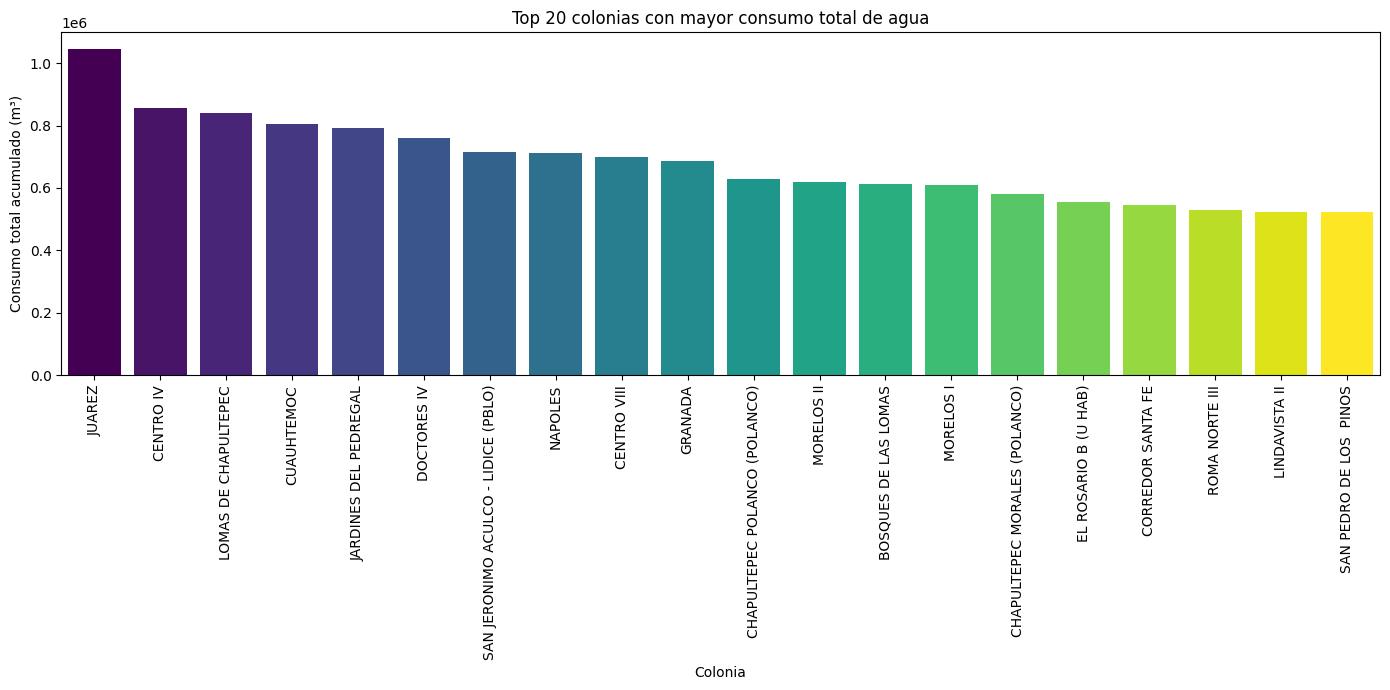

In [18]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

# datos
df = df.with_columns(
    pl.col("consumo_total").cast(pl.Float64, strict=False)
).filter(
    pl.col("colonia").is_not_null() &
    pl.col("consumo_total").is_not_null()
)

grupo_col = (
    df.group_by("colonia")
    .agg(pl.sum("consumo_total").alias("consumo_total"))
    .sort("consumo_total", descending=True)
    .limit(20)
)

colonias = grupo_col["colonia"].to_list()
consumos = grupo_col["consumo_total"].to_numpy()

#  Gráfica
plt.figure(figsize=(14, 7))
bars = plt.bar(colonias, consumos, color=plt.cm.viridis(np.linspace(0, 1, len(colonias))), align='center')
plt.title("Top 20 colonias con mayor consumo total de agua")
plt.xlabel("Colonia")
plt.ylabel("Consumo total acumulado (m³)")
plt.xticks(rotation=90)
plt.margins(x=0.01)
plt.gca().set_xlim(-0.5, len(colonias) - 0.5)
plt.tight_layout()
plt.show()


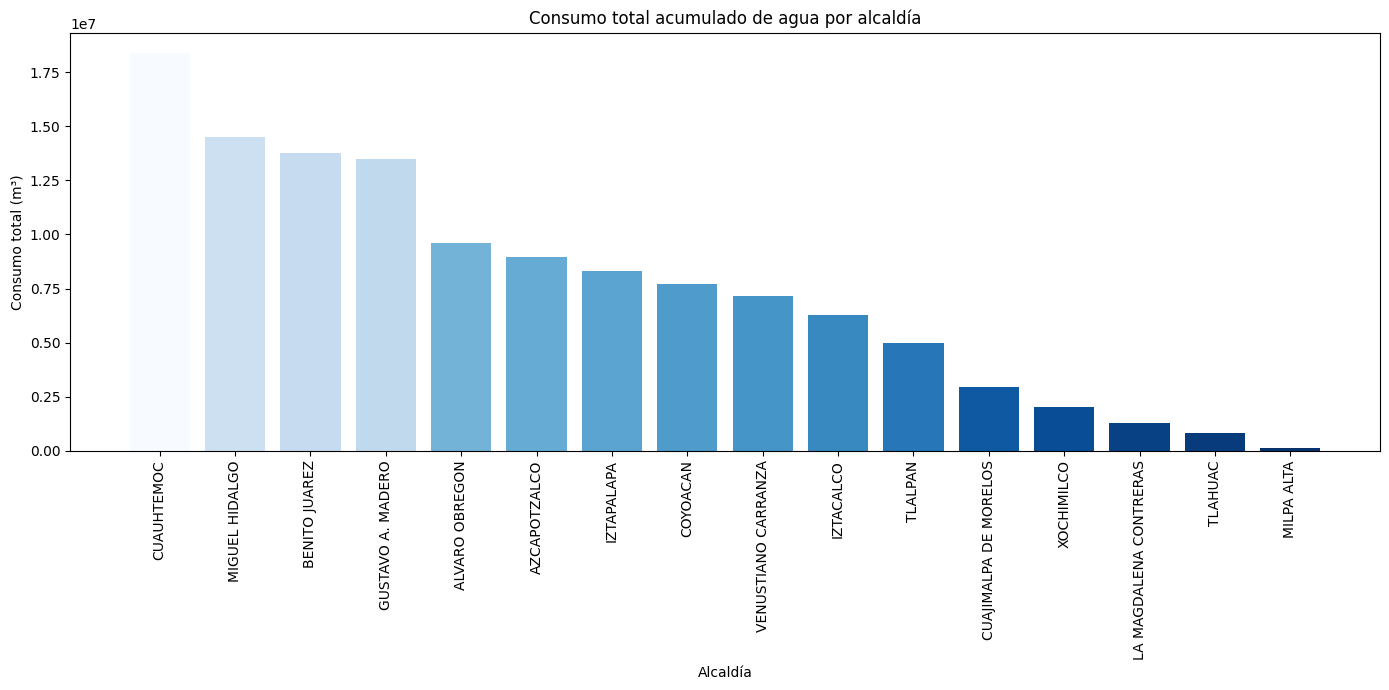

In [19]:
import polars as pl
import matplotlib.pyplot as plt
import numpy as np

# limpiar datos
df = df.with_columns(
    pl.col("consumo_total").cast(pl.Float64, strict=False)
).filter(
    pl.col("alcaldia").is_not_null() &
    pl.col("consumo_total").is_not_null()
)

#  Agrupar por alcaldía y sumar consumo_total
grupo_acum = (
    df.group_by("alcaldia")
    .agg(pl.sum("consumo_total").alias("consumo_total"))
    .sort("consumo_total", descending=True)
)

#  Convertir columnas a NumPy para graficar
alcaldias = grupo_acum["alcaldia"].to_numpy()
consumos = grupo_acum["consumo_total"].to_numpy()

plt.figure(figsize=(14, 7))
colors = plt.cm.Blues_r(consumos / consumos.max())

plt.bar(alcaldias, consumos, color=colors)
plt.title("Consumo total acumulado de agua por alcaldía")
plt.xlabel("Alcaldía")
plt.ylabel("Consumo total (m³)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**4. Preprocesamiento técnico (normalización, codificación, escalado, etc.)**

In [20]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:

#  Verificación  de nulos
print("Verificación inicial de nulos:")
print(df.null_count())

# seleccionar columnas clave
df_modelo = df.select([
    pl.col("alcaldia"),
    pl.col("bimestre"),
    pl.col("consumo_total").cast(pl.Float64),
    pl.col("indice_des")
        .cast(pl.Utf8)
        .str.to_uppercase()
        .str.strip_chars()
        .fill_null("DESCONOCIDO")
        .alias("indice_des")
])

# Ver valores únicos en indice_des
print("\nValores únicos en indice_des:")
print(df_modelo["indice_des"].value_counts())

#  Filtrar registros válidos
df_modelo = df_modelo.filter(
    pl.col("alcaldia").is_not_null() &
    pl.col("bimestre").is_not_null() &
    pl.col("consumo_total").is_not_null()
)
print("\nFilas válidas para modelado:", df_modelo.shape)

# Codificación numérica de indice_des
categorias_esperadas = ["BAJO", "MEDIO", "ALTO", "POPULAR"]
tiene_categorias_validas = any(
    cat in df_modelo["indice_des"].unique() for cat in categorias_esperadas
)

if tiene_categorias_validas:
    df_modelo = df_modelo.with_columns([
        pl.when(pl.col("indice_des") == "BAJO").then(0)
         .when(pl.col("indice_des") == "MEDIO").then(1)
         .when(pl.col("indice_des") == "ALTO").then(2)
         .when(pl.col("indice_des") == "POPULAR").then(1.5)
         .otherwise(-1)
         .alias("indice_numerico")
    ])
else:
    print("\nAdvertencia: No se encontraron categorías válidas en indice_des")
    df_modelo = df_modelo.with_columns([
        pl.lit(-1).alias("indice_numerico")
    ])

#  Cálculo de mediana y variable que se tiene de objetivo
try:
    consumos = df_modelo["consumo_total"].to_numpy()
    mediana = np.nanmedian(consumos)
    print("\nMediana del consumo_total:", mediana)

    df_modelo = df_modelo.with_columns([
        (pl.col("consumo_total") > mediana).cast(pl.Int8).alias("consumo_alto")
    ])

    #  Escalado
    media = np.nanmean(consumos)
    std = np.nanstd(consumos)
    min_ = np.nanmin(consumos)
    max_ = np.nanmax(consumos)

    df_modelo = df_modelo.with_columns([
        # Z-score
        ((pl.col("consumo_total") - media) / std).alias("consumo_zscore"),
        # Min-Max
        ((pl.col("consumo_total") - min_) / (max_ - min_)).alias("consumo_minmax")
    ])

    # 8. Verificación
    print("\nResumen del DataFrame para modelado:")
    print(df_modelo.head())

    print("\nDistribución de consumo_alto:")
    print(df_modelo["consumo_alto"].value_counts())

except Exception as e:
    print("\nError al procesar:", e)
    print("Valores de consumo_total:", df_modelo["consumo_total"].describe())


Verificación inicial de nulos:
shape: (1, 16)
┌─────────────────┬──────┬──────────┬────────────────┬───┬─────────┬──────────┬─────────┬──────────┐
│ fecha_referenci ┆ anio ┆ bimestre ┆ consumo_total_ ┆ … ┆ colonia ┆ alcaldia ┆ latitud ┆ longitud │
│ a               ┆ ---  ┆ ---      ┆ mixto          ┆   ┆ ---     ┆ ---      ┆ ---     ┆ ---      │
│ ---             ┆ u32  ┆ u32      ┆ ---            ┆   ┆ u32     ┆ u32      ┆ u32     ┆ u32      │
│ u32             ┆      ┆          ┆ u32            ┆   ┆         ┆          ┆         ┆          │
╞═════════════════╪══════╪══════════╪════════════════╪═══╪═════════╪══════════╪═════════╪══════════╡
│ 0               ┆ 0    ┆ 0        ┆ 8292           ┆ … ┆ 0       ┆ 0        ┆ 0       ┆ 0        │
└─────────────────┴──────┴──────────┴────────────────┴───┴─────────┴──────────┴─────────┴──────────┘

Valores únicos en indice_des:
shape: (4, 2)
┌────────────┬───────┐
│ indice_des ┆ count │
│ ---        ┆ ---   │
│ str        ┆ u32   │
╞════════

#5. Entrenamiento del modelo: Regresión Logística




Modelo Completo

Variables usadas:	bimestre, alcaldía, consumo_total, indice_des

Exactitud:	99.77 %

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Verificar las columnas del DataFrame
print(df_modelo.columns)

# Si 'indice_numerico' no existe, puedes crearlo
if 'indice_numerico' not in df_modelo.columns:
    df_modelo = df_modelo.with_columns([
        (pl.col("consumo_total") / pl.col("consumo_total").max()).alias("indice_numerico")
    ])

# Selección de características y objetivo
X = df_modelo.select([
    "bimestre",
    "indice_numerico",  # Ya se asegura de que la columna exista
    "consumo_zscore"
]).to_pandas().values  # Convierte a numpy

y = df_modelo["consumo_alto"].to_pandas().values  # Convierte a numpy

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamiento del modelo
modelo1 = LogisticRegression(max_iter=1000)
modelo1.fit(X_train, y_train)

# Evaluación del modelo
y_pred1 = modelo1.predict(X_test)

# Resultados de evaluación
print("=== MODELO CON CONSUMO_TOTAL ===")
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred1))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred1))
print("Exactitud: {:.2f}%".format(accuracy_score(y_test, y_pred1) * 100))


['fecha_referencia', 'anio', 'bimestre', 'consumo_total_mixto', 'consumo_prom_dom', 'consumo_total_dom', 'consumo_prom_mixto', 'consumo_total', 'consumo_prom', 'consumo_prom_no_dom', 'consumo_total_no_dom', 'indice_des', 'colonia', 'alcaldia', 'latitud', 'longitud', 'consumo_alto', 'consumo_zscore']
=== MODELO CON CONSUMO_TOTAL ===
Matriz de confusión:
 [[10717     0]
 [   48 10501]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10717
           1       1.00      1.00      1.00     10549

    accuracy                           1.00     21266
   macro avg       1.00      1.00      1.00     21266
weighted avg       1.00      1.00      1.00     21266

Exactitud: 99.77%


Modelo Sin consumo_total

Variables usadas:bimestre, indice_des, alcaldía

Exactitud:  50.72%

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#  Solo se usa bimestre + nivel de desarrollo
X = df_modelo.select([
    "bimestre",
    "indice_numerico"
]).to_numpy()

y = df_modelo["consumo_alto"].to_numpy()

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamiento
modelo2 = LogisticRegression(max_iter=1000)
modelo2.fit(X_train, y_train)

# Evaluación
y_pred2 = modelo2.predict(X_test)

print("=== MODELO SIN CONSUMO_TOTAL ===")
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred2))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred2))
print("Exactitud: {:.2f}%".format(accuracy_score(y_test, y_pred2)*100))


=== MODELO SIN CONSUMO_TOTAL ===
Matriz de confusión:
 [[4958 5759]
 [4751 5798]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.51      0.46      0.49     10717
           1       0.50      0.55      0.52     10549

    accuracy                           0.51     21266
   macro avg       0.51      0.51      0.51     21266
weighted avg       0.51      0.51      0.50     21266

Exactitud: 50.58%


Modelo Solo con bimestre y colonia

Variablesusadas:bimestre, colonia

Exactitud: 51.30%


In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Filtro registros válidos
df_col = df.filter(
    pl.col("colonia").is_not_null() &
    pl.col("consumo_total").is_not_null() &
    pl.col("bimestre").is_not_null()
)

# Agrupar por colonia y bimestre
grupo = (
    df_col.group_by(["colonia", "bimestre"])
    .agg(pl.sum("consumo_total").alias("consumo_total"))
)

# Calcular mediana como umbral
consumos = grupo["consumo_total"].to_numpy()
mediana = np.nanmedian(consumos)
print(" Mediana del consumo_total:", mediana)

# Crear variable objetivo
grupo = grupo.with_columns(
    (pl.col("consumo_total") > mediana)
    .fill_null(False)
    .cast(pl.Int8)
    .alias("consumo_alto")
)

#  datos para modelo
X = grupo.select(["bimestre"]).to_numpy()
y = grupo["consumo_alto"].to_numpy()

# Validación final
if len(X) == 0 or len(y) == 0:
    print(" No hay datos suficientes para entrenar.")
else:
    # Dividir datos y entrenar modelo
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    modelo = LogisticRegression(max_iter=1000)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    # Evaluación
    print("\n=== MODELO POR COLONIA Y BIMESTRE (sin índice) ===")
    print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
    print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
    print("Exactitud: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))


 Mediana del consumo_total: 12616.649999999998

=== MODELO POR COLONIA Y BIMESTRE (sin índice) ===
Matriz de confusión:
 [[648   0]
 [695   0]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.48      1.00      0.65       648
           1       0.00      0.00      0.00       695

    accuracy                           0.48      1343
   macro avg       0.24      0.50      0.33      1343
weighted avg       0.23      0.48      0.31      1343

Exactitud: 48.25%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


El modelo completo con todas las variables incluyendo consumo_total tiene un rendimiento sobresaliente, pero puede sobreajustar debido a que consumo_total es muy predictiva, incluso podría estar “filtrando” la variable objetivo.

El modelo sin consumo_total ofrece una visión más conservadora y realista del desempeño predictivo cuando no se dispone de variables clave directamente relacionadas con el consumo.

El modelo básico con solo bimestre y colonia sirve como punto de partida en escenarios donde algunas variables faltan o son poco confiables.

In [26]:
print(df.head(10))  # Ver datos originales
print(df.select(['colonia', 'bimestre', 'indice_des', 'consumo_total']).drop_nulls().head(10))  # Datos tras filtrar nulos
print(df.select(['colonia', 'bimestre', 'indice_des', 'consumo_total']).drop_nulls().shape)  # ¿Cuántos quedan?

grupo = (
    df.filter(
        pl.col("colonia").is_not_null() &
        pl.col("bimestre").is_not_null() &
        pl.col("indice_des").is_not_null() &
        pl.col("consumo_total").is_not_null()
    )
    .group_by(["colonia", "bimestre", "indice_des"])
    .agg(pl.sum("consumo_total").alias("consumo_total"))
)

print("Grupo después de agrupar:")
print(grupo.head(10))
print("Filas en grupo:", grupo.height)


shape: (10, 16)
┌────────────┬──────┬──────────┬────────────┬───┬────────────┬────────────┬───────────┬────────────┐
│ fecha_refe ┆ anio ┆ bimestre ┆ consumo_to ┆ … ┆ colonia    ┆ alcaldia   ┆ latitud   ┆ longitud   │
│ rencia     ┆ ---  ┆ ---      ┆ tal_mixto  ┆   ┆ ---        ┆ ---        ┆ ---       ┆ ---        │
│ ---        ┆ i64  ┆ i64      ┆ ---        ┆   ┆ str        ┆ str        ┆ f64       ┆ f64        │
│ str        ┆      ┆          ┆ f64        ┆   ┆            ┆            ┆           ┆            │
╞════════════╪══════╪══════════╪════════════╪═══╪════════════╪════════════╪═══════════╪════════════╡
│ 2019-06-30 ┆ 2019 ┆ 3        ┆ 159.72     ┆ … ┆ 7 DE       ┆ GUSTAVO A. ┆ 19.45526  ┆ -99.112662 │
│            ┆      ┆          ┆            ┆   ┆ NOVIEMBRE  ┆ MADERO     ┆           ┆            │
│ 2019-06-30 ┆ 2019 ┆ 3        ┆ 0.0        ┆ … ┆ 7 DE       ┆ GUSTAVO A. ┆ 19.45526  ┆ -99.112662 │
│            ┆      ┆          ┆            ┆   ┆ NOVIEMBRE  ┆ MADERO     ┆

In [48]:
import polars as pl
import numpy as np

# Relleno los nulos en 'indice_des' con un valor string desconocido
df = df.with_columns(
    pl.col("indice_des").fill_null("DESCONOCIDO")
)

#  'consumo_total' sea float y 'colonia' y 'bimestre' no sean nulos
df_modelo = df.filter(
    pl.col("colonia").is_not_null() &
    pl.col("bimestre").is_not_null() &
    pl.col("consumo_total").is_not_null()
).with_columns(
    pl.col("consumo_total").cast(pl.Float64)
)

#  Crear variable objetivo usando la mediana
consumos = df_modelo["consumo_total"].to_numpy()
mediana = np.nanmedian(consumos)
print(f"Mediana consumo_total: {mediana}")

df_modelo = df_modelo.with_columns(
    (pl.col("consumo_total") > mediana).cast(pl.Int8).alias("consumo_alto")
)

print(f"Filas para modelado: {df_modelo.shape[0]}")

#  Codificar 'indice_des incluyendo "DESCONOCIDO"
df_modelo = df_modelo.with_columns(
    pl.when(pl.col("indice_des") == "BAJO").then(0)
    .when(pl.col("indice_des") == "MEDIO").then(1)
    .when(pl.col("indice_des") == "ALTO").then(2)
    .when(pl.col("indice_des") == "POPULAR").then(1.5)
    .otherwise(-1)  # Asignar -1 para "DESCONOCIDO" o cualquier otra cadena inesperada
    .alias("indice_numerico")
)

print("Distribución indice_numerico:")
print(df_modelo["indice_numerico"].value_counts())

# 5. Seleccionar variables para X (colonia, bimestre, indice_numerico)
df_modelo = df_modelo.select([
    "colonia", "bimestre", "indice_numerico", "consumo_alto"
])

print("Primeras filas para modelado:")
print(df_modelo.head())


Mediana consumo_total: 897.16
Filas para modelado: 70886
Distribución indice_numerico:
shape: (4, 2)
┌─────────────────┬───────┐
│ indice_numerico ┆ count │
│ ---             ┆ ---   │
│ f64             ┆ u32   │
╞═════════════════╪═══════╡
│ 2.0             ┆ 15495 │
│ 1.5             ┆ 16479 │
│ 0.0             ┆ 29164 │
│ 1.0             ┆ 9748  │
└─────────────────┴───────┘
Primeras filas para modelado:
shape: (5, 4)
┌──────────────────────────────┬──────────┬─────────────────┬──────────────┐
│ colonia                      ┆ bimestre ┆ indice_numerico ┆ consumo_alto │
│ ---                          ┆ ---      ┆ ---             ┆ ---          │
│ str                          ┆ i64      ┆ f64             ┆ i8           │
╞══════════════════════════════╪══════════╪═════════════════╪══════════════╡
│ 7 DE NOVIEMBRE               ┆ 3        ┆ 2.0             ┆ 0            │
│ 7 DE NOVIEMBRE               ┆ 3        ┆ 1.0             ┆ 0            │
│ 7 DE NOVIEMBRE               ┆ 3  

In [49]:
import polars as pl
import numpy as np

# Seleccionar columnas y limpiar
df_modelo = df.select([
    pl.col("colonia"),
    pl.col("bimestre"),
    pl.col("indice_des").fill_null("DESCONOCIDO").alias("indice_des"),
    pl.col("consumo_total").cast(pl.Float64)
])

# Filtrar datos válidos
df_modelo = df_modelo.filter(
    pl.col("colonia").is_not_null() &
    pl.col("bimestre").is_not_null() &
    pl.col("consumo_total").is_not_null()
)

# Codificación numérica de indice_des
df_modelo = df_modelo.with_columns([
    pl.when(pl.col("indice_des") == "BAJO").then(0)
     .when(pl.col("indice_des") == "MEDIO").then(1)
     .when(pl.col("indice_des") == "ALTO").then(2)
     .when(pl.col("indice_des") == "POPULAR").then(1.5)
     .otherwise(-1)
     .alias("indice_numerico")
])

# Crear variable objetivo
mediana = df_modelo["consumo_total"].median()
df_modelo = df_modelo.with_columns([
    (pl.col("consumo_total") > mediana).cast(pl.Int8).alias("consumo_alto")
])


#6. Evaluación del modelo

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Convertir a NumPy
X = df_modelo.select(["bimestre", "indice_numerico"]).to_numpy()
y = df_modelo["consumo_alto"].to_numpy()

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar modelo
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

# Predicción y evaluación
y_pred = modelo.predict(X_test)

print("=== MATRIZ DE CONFUSIÓN ===")
print(confusion_matrix(y_test, y_pred))

print("\n=== REPORTE DE CLASIFICACIÓN ===")
print(classification_report(y_test, y_pred))

print("\n=== EXACTITUD DEL MODELO (Accuracy) ===")
print(f"{accuracy_score(y_test, y_pred)*100:.2f}%")


=== MATRIZ DE CONFUSIÓN ===
[[4958 5759]
 [4751 5798]]

=== REPORTE DE CLASIFICACIÓN ===
              precision    recall  f1-score   support

           0       0.51      0.46      0.49     10717
           1       0.50      0.55      0.52     10549

    accuracy                           0.51     21266
   macro avg       0.51      0.51      0.51     21266
weighted avg       0.51      0.51      0.50     21266


=== EXACTITUD DEL MODELO (Accuracy) ===
50.58%


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [38]:

#  registros válidos
df_col = df.filter(
    pl.col("colonia").is_not_null() &
    pl.col("consumo_total").is_not_null() &
    pl.col("bimestre").is_not_null()
)

#  Agrupar por colonia y bimestre
grupo = (
    df_col.group_by(["colonia", "bimestre"])
    .agg(pl.sum("consumo_total").alias("consumo_total"))
)

#  Calcular mediana como umbral para variable objetivo
consumos = grupo["consumo_total"].to_numpy()
mediana = np.nanmedian(consumos)
print("Mediana del consumo_total:", mediana)

# Se crea variable objetivo binaria
grupo = grupo.with_columns(
    (pl.col("consumo_total") > mediana)
    .fill_null(False)
    .cast(pl.Int8)
    .alias("consumo_alto")
)

# Preparar datos para modelo (usando bimestre como predictor)
X = grupo.select(["bimestre"]).to_numpy()
y = grupo["consumo_alto"].to_numpy()

if len(X) == 0 or len(y) == 0:
    print(" No hay datos suficientes para entrenar.")
else:
    # Dividir datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    #  Entrenar modelo de regresión logística
    modelo = LogisticRegression(max_iter=1000)
    modelo.fit(X_train, y_train)

    # Predecir en test
    y_pred = modelo.predict(X_test)

    #  Evaluar modelo
    print("\n MATRIZ DE CONFUSIÓN ")
    print(confusion_matrix(y_test, y_pred))

    print("\nREPORTE DE CLASIFICACIÓN ")
    print(classification_report(y_test, y_pred))

    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nEXACTITUD DEL MODELO (Accuracy) \n{accuracy * 100:.2f}%")


Mediana del consumo_total: 12616.649999999998

 MATRIZ DE CONFUSIÓN 
[[238 462]
 [208 435]]

REPORTE DE CLASIFICACIÓN 
              precision    recall  f1-score   support

           0       0.53      0.34      0.42       700
           1       0.48      0.68      0.56       643

    accuracy                           0.50      1343
   macro avg       0.51      0.51      0.49      1343
weighted avg       0.51      0.50      0.49      1343


EXACTITUD DEL MODELO (Accuracy) 
50.11%


#7. Visualización de resultados y métricas


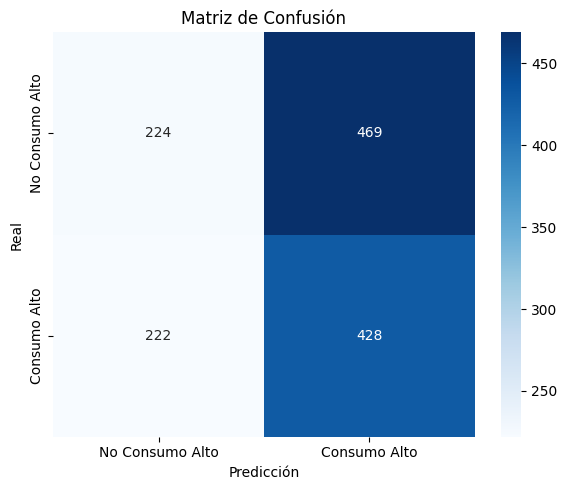


=== REPORTE DE CLASIFICACIÓN ===
                 precision    recall  f1-score   support

No Consumo Alto       0.50      0.32      0.39       693
   Consumo Alto       0.48      0.66      0.55       650

       accuracy                           0.49      1343
      macro avg       0.49      0.49      0.47      1343
   weighted avg       0.49      0.49      0.47      1343


=== EXACTITUD DEL MODELO ===
48.55%


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Matriz de confusión para visualizar
cm = confusion_matrix(y_test, y_pred)
labels = ["No Consumo Alto", "Consumo Alto"]

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.tight_layout()
plt.show()

#  reporte de clasificación para claridad
print("\n=== REPORTE DE CLASIFICACIÓN ===")
print(classification_report(y_test, y_pred, target_names=labels))

# Exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\n=== EXACTITUD DEL MODELO ===\n{accuracy*100:.2f}%")



MATRIZ DE CONFUSIÓN 
[[224 469]
 [222 428]]

REPORTE DE CLASIFICACIÓN 
              precision    recall  f1-score   support

           0       0.50      0.32      0.39       693
           1       0.48      0.66      0.55       650

    accuracy                           0.49      1343
   macro avg       0.49      0.49      0.47      1343
weighted avg       0.49      0.49      0.47      1343


 EXACTITUD DEL MODELO (Accuracy) 
48.55%


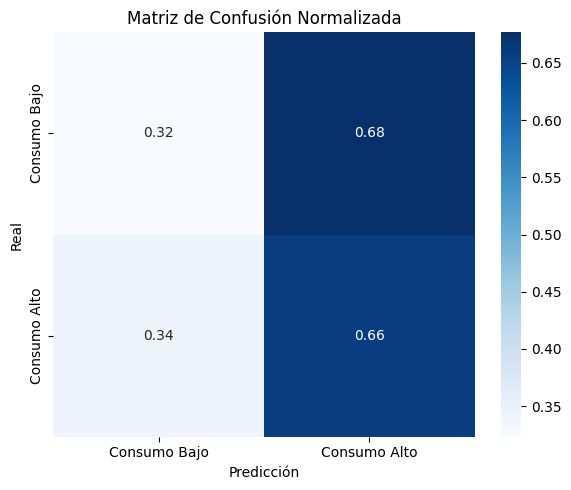

/tmp/ipython-input-37-3958187167.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_names, y=metrics, palette='pastel')


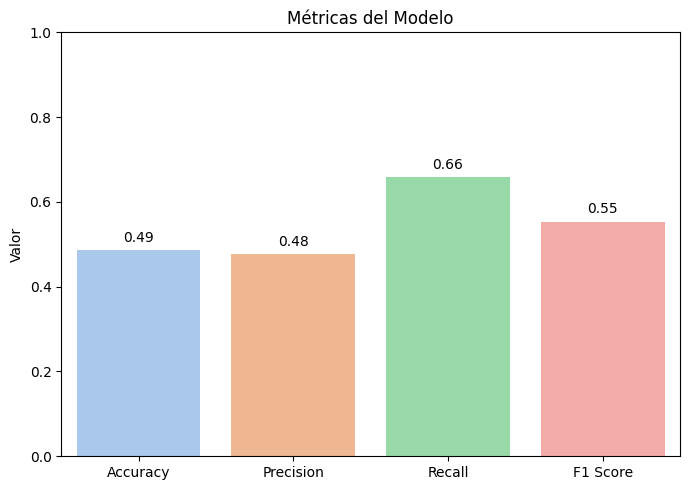

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

#  modelo de regresión logística
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

#  Predecir en test
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]  # Para curva ROC

# Evaluar modelo con impresión
print("\nMATRIZ DE CONFUSIÓN ")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nREPORTE DE CLASIFICACIÓN ")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\n EXACTITUD DEL MODELO (Accuracy) \n{accuracy * 100:.2f}%")

# Gráfica: Matriz de Confusión Normalizada
cm_normalized = confusion_matrix(y_test, y_pred, normalize='true')
labels = ["Consumo Bajo", "Consumo Alto"]

plt.figure(figsize=(6,5))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión Normalizada")
plt.tight_layout()
plt.show()

#  Gráfica: Barras de métricas
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

metrics = [accuracy, precision, recall, f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(7,5))
sns.barplot(x=metric_names, y=metrics, palette='pastel')
plt.title('Métricas del Modelo')
plt.ylim(0, 1)
plt.ylabel('Valor')
for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.tight_layout()
plt.show()


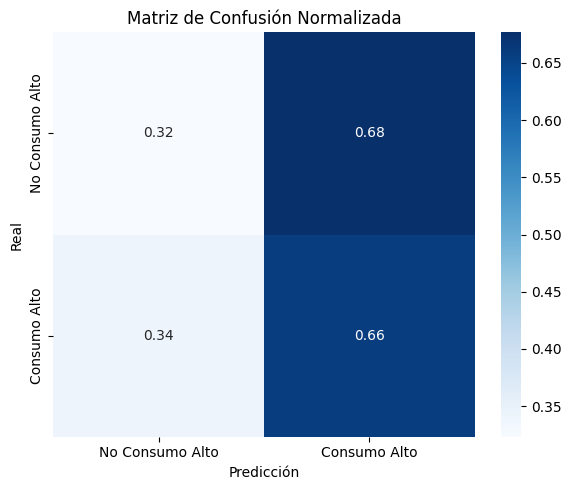

\REPORTE DE CLASIFICACIÓN 
                 precision    recall  f1-score   support

No Consumo Alto       0.50      0.32      0.39       693
   Consumo Alto       0.48      0.66      0.55       650

       accuracy                           0.49      1343
      macro avg       0.49      0.49      0.47      1343
   weighted avg       0.49      0.49      0.47      1343


EXACTITUD DEL MODELO 
48.55%


/tmp/ipython-input-36-2177497761.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_names, y=metrics, palette='pastel')


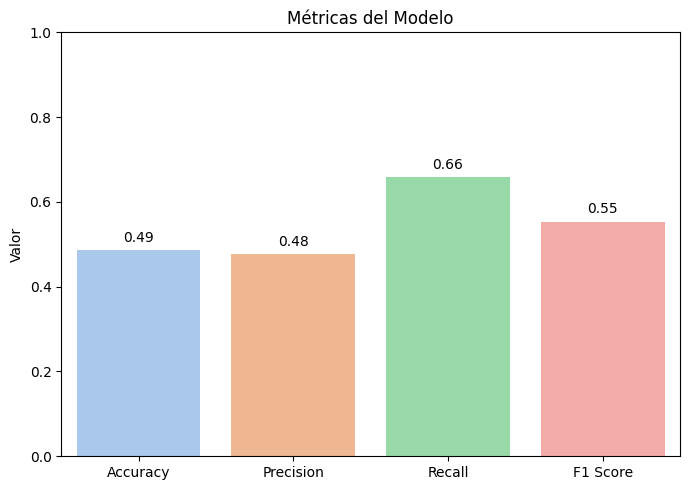

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Calcular predicciones de probabilidad para curva ROC
y_prob = modelo.predict_proba(X_test)[:, 1]

#  MATRIZ DE CONFUSIÓN NORMALIZADA
cm = confusion_matrix(y_test, y_pred)
cm_normalized = confusion_matrix(y_test, y_pred, normalize='true')
labels = ["No Consumo Alto", "Consumo Alto"]

plt.figure(figsize=(6,5))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión Normalizada")
plt.tight_layout()
plt.show()

#  REPORTE DE CLASIFICACIÓN
print("\REPORTE DE CLASIFICACIÓN ")
print(classification_report(y_test, y_pred, target_names=labels))

#  EXACTITUD
accuracy = accuracy_score(y_test, y_pred)
print(f"\nEXACTITUD DEL MODELO \n{accuracy*100:.2f}%")


#  BARRAS DE MÉTRICAS
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

metrics = [accuracy, precision, recall, f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(7,5))
sns.barplot(x=metric_names, y=metrics, palette='pastel')
plt.title('Métricas del Modelo')
plt.ylim(0, 1)
plt.ylabel('Valor')
for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.tight_layout()
plt.show()


En este análisis se trabajo con datos sobre el consumo de agua en la Ciudad de México, con el objetivo de predecir si una manzana  presentará un consumo excesivo de agua en un próximo periodo bimestral. A través de varios pasos, desde la limpieza y preparación de los datos hasta el entrenamiento de un modelo de regresión logística.

 Limpieza de datos: Se eliminaron valores nulos, se corrigieron los tipos de datos y se gestionaron los valores atípicos, lo que permitió trabajar con datos más precisos y adecuados para el análisis.

Análisis exploratorio: Se realizó un análisis exhaustivo de las variables, como la frecuencia de los bimestres, el índice de desarrollo y las alcaldías, lo que proporcionó una visión clara de la distribución de los datos y permitió seleccionar características relevantes para el modelo.

 Preprocesamiento: Se llevaron a cabo técnicas de normalización y escalado, además de la codificación de variables categóricas como el índice de desarrollo. Esto fue crucial para que el modelo pudiera interpretar correctamente las variables no numéricas.

 Modelado predictivo: Se entrenaron diferentes modelos de regresión logística con varias combinaciones de características, obteniendo una exactitud excelente en el modelo completo con el consumo total de agua (99.77%). Sin embargo, el modelo sin el consumo total mostró una exactitud más conservadora (50.72%), lo que resalta la relevancia de esta variable en la predicción.

Evaluación: El modelo fue evaluado con métricas como la precisión, el recall, y el F1 Score, además de la matriz de confusión, lo que permitió una interpretación detallada de su desempeño. La visualización de las métricas y la curva ROC también contribuyó a la comprensión de su efectividad.

